In [1]:
from PIL import Image
import h5py
import anubisPlotUtils as anPlot
import json
import numpy as np
import os
import hist as hi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import sys
import ANUBIS_triggered_functions as ANT
import pandas as pd
import matplotlib.backends.backend_pdf
from matplotlib.ticker import MultipleLocator
import plotly
import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


%matplotlib inline

In [2]:
current_directory=  os.path.dirname(os.getcwd())

data = ANT.importDatafile(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_0227.h5")

In [3]:
data_ATLAS = [sublist[:94230] for sublist in data]
etaHits, phiHits = ANT.divideHitCountsByRPC_Timed(data_ATLAS)

In [4]:
#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_ATLAS = ANT.FindCoincidentHits(etaHits,phiHits,15)

#Spatial Clustering
coincident_hits_ATLAS_clustered = ANT.cluster(coincident_hits_ATLAS)

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0

In [6]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events = ANT.filter_events(coincident_hits_ATLAS_clustered,2,3)
print("......")
all_6_rpcs = ANT.filter_events(coincident_hits_ATLAS_clustered,3,6)

Number of events in filter = 27227
......
Number of events in filter = 1334


In [17]:
Cosmics = ANT.importFromHDF5File(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_1427_cosmics.h5")

data_cosmics = [sublist[:55489] for sublist in Cosmics]

c_etaHits, c_phiHits = ANT.divideHitCountsByRPC_Timed(data_cosmics)

#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_cosmics = ANT.FindCoincidentHits(c_etaHits,c_phiHits,15)

#Spatial Clustering
coincident_hits_cosmics_clustered = ANT.cluster(coincident_hits_cosmics)

print(len(coincident_hits_cosmics_clustered))

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1

In [18]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,2,3)
print("......")
all_6_rpcs_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,3,6)

Number of events in filter = 9390
......
Number of events in filter = 424


In [56]:
def extract_coords_timed_Chi2(event,max_cluster_size):

    #This function converts spatially clusters in RPCs into x and y coordinates (z given by RPC number)
    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]

    #Extract x and y coords of cluster in event
    distance_per_phi_channel = 2.7625 #cm
    distance_per_eta_channel = 2.9844 #cm
    
    coords = []

    for RPC in range(6):
        
        x_clusters = [x for x in event[2][RPC][0] if len(x)<=max_cluster_size] #phi direction
        y_clusters = [y for y in event[2][RPC][1] if len(y)<=max_cluster_size] #eta direction

        #Finding size of largest cluster, consider coordinates bad if largest cluster is larger than 6.
        x_clusters_lengths = [len(x) for x in event[2][RPC][0]]
        y_clusters_lengths = [len(y) for y in event[2][RPC][1]]

        max_length = max(max(x_clusters_lengths, default=0), max(y_clusters_lengths, default=0))

        x_coords = []
        y_coords = []

        for x_cluster in x_clusters:
           #x_cluster = [[RPC,CHANNEL,TIME,'phi'],...]
            phi_channels = [x[1] for x in x_cluster]
            phi_times = [t[2] for t in x_cluster]

            #Convert the channel number into a measurement along the RPC.
            x_values = [(phi_channel+0.5)*distance_per_phi_channel for phi_channel in phi_channels]

            #Variance in x coord.
            x_var = (1*distance_per_phi_channel)**2/12

            x_coords.append([np.mean(x_values),x_var,np.average(phi_times)])

        for y_cluster in y_clusters:
            #y_cluster = [[RPC,CHANNEL,TIME,'eta'],...]
            eta_channels_corrected = [31-y[1] for y in y_cluster] #corrected for labelling from 0 to 31.
            eta_times = [t[2] for t in y_cluster]
            y_values = [(channel_num+0.5)*distance_per_eta_channel for channel_num in eta_channels_corrected]
            
            y_var = (1*distance_per_eta_channel)**2 /12
            y_coords.append([np.mean(y_values),y_var,np.average(eta_times)])

        if x_coords and y_coords and max_length<6:

            coords.append([x_coords, y_coords])

        else:
            coords.append([[],[],"N"])

    #[x_coords] = [[x,err_x,x_time],...]
    
    #RPC_coords = [x_coords,y_coords]

    #coords = [[RPC1_coords],[RPC2_coords],[RPC3_coords],...]
    return coords

def extract_DT_DZ_Chi2(coords):

    RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.
    #coords = [[[x0,var,time],[y0,var,time],z0],[[x1,var,time],[y1,var,time],z1],...,[[x5,var,time],[y5,var,time],z5]]

    phi_times = [[RPC,x[0][2]] for RPC, x in enumerate(coords) if isinstance(x[2], (float, int))]
    eta_times = [[RPC,y[1][2]] for RPC, y in enumerate(coords) if isinstance(y[2], (float, int))]

    #Should already be sorted, but just in case.
    #Sort times by RPC, with RPC at lowest height at first entry.

    if len(phi_times) > 1:

        phi_times_sorted = sorted(phi_times, key=lambda x: x[0])

        #print(times_sorted)

        phi_dT = phi_times_sorted[-1][1]-phi_times_sorted[0][1]
        #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
        #Vice-versa for dT < 0 

        phi_first_RPC = phi_times_sorted[0][0]
        phi_last_RPC = phi_times_sorted[-1][0]

        dZ = RPC_heights[phi_last_RPC] - RPC_heights[phi_first_RPC]

        if len(eta_times) >1:

            eta_times_sorted = sorted(eta_times, key=lambda x: x[0])

            eta_dT = eta_times_sorted[-1][1]-eta_times_sorted[0][1]

        dT = [phi_dT,eta_dT]
    
        return dT, dZ
    
    else:
        pass

def fit_event_chi2(coordinates_with_error):
    #Coordinates = [[[x0,var,time],[y0,var],z0],[[x1,var,time],[y1,var],z1],...,[[x5,var,time],[y5,var],z5]]
    #Z coordinate given by height of relevant RPC.
    #Using SVD

    # Calculate dT for event, in ns
    dT, dZ = extract_DT_DZ_Chi2(coordinates_with_error)
    
    coordinates = []

    for coords in coordinates_with_error:
        coordinates.append([coords[0][0],coords[1][0],coords[2]])

    centroid = np.mean(coordinates, axis=0)
    subtracted = coordinates-centroid

    # performing SVD
    _, _, V = np.linalg.svd(subtracted)
    
    # find the direction vector (which is the right singular vector corresponding to the largest singular value)
    direction = V[0, :]

    # A line is defined by the average and its direction
    p0 = centroid
    d = direction

    #Work out Chi2. Minimise this to find best fit (from possible combos)

    Chi2 = 0

    i = 0 

    for point in coordinates_with_error:
        
        i+=2
        
        z = point[2]
        x = point[0][0]
        y = point[1][0]
        x_var = point[0][1]
        y_var = point[1][1]

        z_0 = centroid[2]

        # t = (z-z_0)/d_z

        t = (z-z_0)/d[2]

        # Find expected (x,y) coordinates at that height.

        x_traj = centroid[0] + t*d[0]
        y_traj = centroid[1] + t*d[1]

        Chi2_x = (x-x_traj)**2 / x_var
        Chi2_y = (y-y_traj)**2 / y_var

        Chi2+= Chi2_x
        Chi2+= Chi2_y

    # i is number of fitted points. There are 4 fitted paramters, 2 for each x and y. 
    doF = i - 4

    Chi2 = Chi2/ doF

    return p0, d, Chi2, coordinates, dT, dZ

def generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations=None, hit_coords=None, depth=0):

    if combinations is None:
        combinations = []
    if hit_coords is None:
        hit_coords = []

    if depth == len(coords):
        combinations.append(hit_coords.copy())
        return combinations

    x_values = coords[depth][0]
    y_values = coords[depth][1]

    if not x_values or not y_values:
        return generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations, hit_coords, depth + 1)

    for x in x_values:
        for y in y_values:
            if x is not None and y is not None and isinstance(x[0], (int, float)) and isinstance(y[0], (int, float)):
                hit_coords.append([x, y, RPC_heights[depth]])
                generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations, hit_coords, depth + 1)
                hit_coords.pop()

    return combinations

def reconstruct_timed_Chi2(event,max_cluster_size):

    #timed tag indicates that timing information from RPC is used to determine direction of vertical transversal of "particle" in the event.

    max_Chi2 = 10

    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]
    RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.

    #Extract x and y coords of cluster in event

    coords = extract_coords_timed_Chi2(event,max_cluster_size)

    # Count the number of empty RPCs
    empty_RPC_count = sum(1 for item in coords if item == [[], [],'N'])

    # If less than 3 elements of coords are occupied, exit the function
    if empty_RPC_count > 3:
        #print("Failed to reconstruct, not enough coords")
        return None  # Exit the function
    
    #NEED TO CHECK IF STILL CROSS CHAMBER! 

    cross_chamberness = 0

    if coords[0] != [[], [], 'N'] or coords[1] != [[], [], 'N'] or coords[2] != [[], [], 'N']:
        cross_chamberness += 1

    if coords[3] != [[], [], 'N']:
        cross_chamberness += 1

    if coords[4] != [[], [], 'N'] or coords[5] != [[], [], 'N']:
        cross_chamberness += 1

    if cross_chamberness < 2:
        #print("Failed to reconstruct, too few chambers")
        return None

    #ITERATING OVER EVERY POSSIBLE COMBINATION OF x,y,z over all 3 RPCs (limited to one x,y per RPC).
    #Doesn't look particularly nice, but there are not many coordinates to loop over usually....

    combinations = ANT.generate_hit_coords_combo_Chi2(coords,RPC_heights)

    #Now for each combo in combinations, attempt to reconstruct a path. See which one gives the best trajectory.

    #If success, print parameters of fitting function.
    #If fail, print reconstruction failed.

    Chi2_current = np.inf
    optimised_coords = None
    optimised_d= None
    optimised_centroid= None
    dT = [np.inf,np.inf]

    for ind,combo in enumerate(combinations):

        centroid, d, Chi2, coordinates, delta_T, delta_Z= fit_event_chi2(combo)

        #delta_T = [delta_T_phi,delta_T_eta]

        if Chi2 < Chi2_current:

            # If new fit is better than old then replace old fit properties.
            dZ = delta_Z 
            dT = delta_T
            Chi2_current = Chi2
            optimised_centroid = centroid
            optimised_d = d
            optimised_coords = coordinates

    #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
    #Vice-versa for dT < 0.

    #dT = 0 case?
    
    if dT[0] != np.inf:

        if dT[0] > 0:
            if optimised_d[2] < 0:
                optimised_d = np.multiply(optimised_d,-1)
        else:
            if optimised_d[2] > 0:
                optimised_d = np.multiply(optimised_d,-1)

        if Chi2_current<max_Chi2:
            return optimised_centroid, optimised_d, optimised_coords, combinations, Chi2_current, dT, dZ

        else:
            #print("Failed to reconstruct, Chi2 too large")
            #return optimised_centroid, optimised_d, optimised_coords, combinations, residuals_current
            return None
    

In [33]:
def extract_angles_phi_eta_timed_DZ(filtered_events):

    #Input is filtered_events, output of ANT.filter_events() function

    angles_eta = []
    angles_phi = []
    delta_times_phi= []
    delta_times_eta= []
    dZ = []
    chi2_values = []

    for i,filtered_event in enumerate(filtered_events):

        print(f"Index= {i}") 
        
        result = reconstruct_timed_Chi2(filtered_event,3)

        if result is not None:

            delta_times_phi.append(result[5][0])
            delta_times_eta.append(result[5][1])

            chi2_values.append(result[4])

            if abs(result[5][0])>40:
                print(f"Index of abnormal event= {i}")
            #Only save angles that actually were reconstructed well

            dZ.append(result[6])
            
            # a.b = |a||b|cos(x)

            #eta angle. 
            #work out the projection of the direction vector in the plane.
            
            v_parr_eta = np.array([0,result[1][1],result[1][2]])

            theta_eta = np.arccos(np.dot(v_parr_eta,[0,0,1]) / np.linalg.norm(v_parr_eta))

            if theta_eta > np.pi / 2:
                theta_eta= np.pi - theta_eta
            
            if v_parr_eta[1] > 0:
                theta_eta*=-1

            angles_eta.append(theta_eta)

            # Phi angles
            #work out the projection of the direction vector in the plane.
            
            v_parr_phi = np.array([result[1][0],0,result[1][2]])

            theta_phi = np.arccos(np.dot(v_parr_phi,[0,0,1]) / np.linalg.norm(v_parr_phi))

            if theta_phi > np.pi / 2:
                theta_phi= np.pi - theta_phi
            
            if v_parr_phi[0] < 0:
                theta_phi*=-1

            angles_phi.append(theta_phi)

    delta_times = [delta_times_phi,delta_times_eta]

    return angles_eta, angles_phi, delta_times, dZ, chi2_values

In [34]:
def plot_time_distribution_fraction_2(times1, times2, title):
    # Flatten the arrays if they are multidimensional
    times1 = np.asarray(times1).flatten()
    times2 = np.asarray(times2).flatten()

    plt.figure(figsize=(16, 10))
    
    # Define bin edges centered on integers between -20 and +20
    bin_edges = np.arange(-20.5, 21.5, 1)

    # Plot histogram with counts
    plt.hist(times1, bins=bin_edges, range=[-20,20], density=True, edgecolor='black',label='Two Chambers')
    plt.hist(times2, bins=bin_edges, range=[-20,20], density=True, edgecolor='black', alpha=0.5, color = 'green', label='Three Chambers')

    # Set x-ticks spacing to 1
    plt.xticks(np.arange(-20, 21, 2))

    plt.xlim(-20,20)

    # Customize the plot
    plt.xlabel('dT / ns')
    plt.ylabel('Fraction')
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.show()

In [42]:
def plot_time_distribution_absolute_2(times1, times2, title):
    # Flatten the arrays if they are multidimensional
    times1 = np.asarray(times1).flatten()
    times2 = np.asarray(times2).flatten()

    plt.figure(figsize=(16, 10))

    # Define bin edges centered on integers between -20 and +20
    bin_edges = np.arange(-20.5, 21.5, 1)

    # Plot histogram with counts
    plt.hist(times1, bins=bin_edges, range=[-20,20], density=False, edgecolor='black',label='Three Chambers, Cosmics')
    plt.hist(times2, bins=bin_edges, range=[-20,20], density=False, edgecolor='black', alpha=0.5, color = 'green', label='Three Chambers, Luminosity Spike')

    # Set x-ticks spacing to 1
    plt.xticks(np.arange(-20, 21, 2))
    plt.xlim(-20,20)

    # Customize the plot
    plt.xlabel('dT / ns')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.show()

In [36]:
angles_eta, angles_phi, times_delta, dZ, chi2_values = extract_angles_phi_eta_timed_DZ(cross_chamber_3_rpc_events)

Index= 0
Index= 1
Index= 2
Index= 3
Index= 4
Index= 5
Index= 6
Index= 7
Index= 8
Index= 9
Index= 10
Index= 11
Index= 12
Index= 13
Index= 14
Index= 15
Index= 16
Index= 17
Index= 18
Index= 19
Index= 20
Index= 21
Index= 22
Index= 23
Index= 24
Index= 25
Index= 26
Index= 27
Index= 28
Index= 29
Index= 30
Index= 31
Index= 32
Index= 33
Index= 34
Index= 35
Index= 36
Index= 37
Index= 38
Index= 39
Index= 40
Index= 41
Index= 42
Index= 43
Index= 44
Index= 45
Index= 46
Index= 47
Index= 48
Index= 49
Index= 50
Index= 51
Index= 52
Index= 53
Index= 54
Index= 55
Index= 56
Index= 57
Index= 58
Index= 59
Index= 60
Index= 61
Index= 62
Index= 63
Index= 64
Index= 65
Index= 66
Index= 67
Index= 68
Index= 69
Index= 70
Index= 71
Index= 72
Index= 73
Index= 74
Index= 75
Index= 76
Index= 77
Index= 78
Index= 79
Index= 80
Index= 81
Index= 82
Index= 83
Index= 84
Index= 85
Index= 86
Index= 87
Index= 88
Index= 89
Index= 90
Index= 91
Index= 92
Index= 93
Index= 94
Index= 95
Index= 96
Index= 97
Index= 98
Index= 99
Index= 100

In [43]:
angles_eta_cosmics, angles_phi_cosmics, times_delta_cosmics, dZ_cosmics, chi2_values_cosmics = extract_angles_phi_eta_timed_DZ(cross_chamber_3_rpc_events_cosmics)

Index= 0
Index= 1
Index= 2
Index= 3
Index= 4
Index= 5
Index= 6
Index= 7
Index= 8
Index= 9
Index= 10
Index= 11
Index= 12
Index= 13
Index= 14
Index= 15
Index= 16
Index= 17
Index= 18
Index= 19
Index= 20
Index= 21
Index= 22
Index= 23
Index= 24
Index= 25
Index= 26
Index= 27
Index= 28
Index= 29
Index= 30
Index= 31
Index= 32
Index= 33
Index= 34
Index= 35
Index= 36
Index= 37
Index= 38
Index= 39
Index= 40
Index= 41
Index= 42
Index= 43
Index= 44
Index= 45
Index= 46
Index= 47
Index= 48
Index= 49
Index= 50
Index= 51
Index= 52
Index= 53
Index= 54
Index= 55
Index= 56
Index= 57
Index= 58
Index= 59
Index= 60
Index= 61
Index= 62
Index= 63
Index= 64
Index= 65
Index= 66
Index= 67
Index= 68
Index= 69
Index= 70
Index= 71
Index= 72
Index= 73
Index= 74
Index= 75
Index= 76
Index= 77
Index= 78
Index= 79
Index= 80
Index= 81
Index= 82
Index= 83
Index= 84
Index= 85
Index= 86
Index= 87
Index= 88
Index= 89
Index= 90
Index= 91
Index= 92
Index= 93
Index= 94
Index= 95
Index= 96
Index= 97
Index= 98
Index= 99
Index= 100

C:\Users\patri\AppData\Local\Temp\ipykernel_11864\1907715721.py:147: RuntimeWarning: divide by zero encountered in scalar divide
  t = (z-z_0)/d[2]
C:\Users\patri\AppData\Local\Temp\ipykernel_11864\1907715721.py:151: RuntimeWarning: invalid value encountered in scalar multiply
  x_traj = centroid[0] + t*d[0]


Index= 983
Index= 984
Index= 985
Index= 986
Index= 987
Index= 988
Index= 989
Index= 990
Index= 991
Index= 992
Index= 993
Index= 994
Index= 995
Index= 996
Index= 997
Index= 998
Index= 999
Index= 1000
Index= 1001
Index= 1002
Index= 1003
Index= 1004
Index= 1005
Index= 1006
Index= 1007
Index= 1008
Index= 1009
Index= 1010
Index= 1011
Index= 1012
Index= 1013
Index= 1014
Index= 1015
Index= 1016
Index= 1017
Index= 1018
Index= 1019
Index= 1020
Index= 1021
Index= 1022
Index= 1023
Index= 1024
Index= 1025
Index= 1026
Index= 1027
Index= 1028
Index= 1029
Index= 1030
Index= 1031
Index= 1032
Index= 1033
Index= 1034
Index= 1035
Index= 1036
Index= 1037
Index= 1038
Index= 1039
Index= 1040
Index= 1041
Index= 1042
Index= 1043
Index= 1044
Index= 1045
Index= 1046
Index= 1047
Index= 1048
Index= 1049
Index= 1050
Index= 1051
Index= 1052
Index= 1053
Index= 1054
Index= 1055
Index= 1056
Index= 1057
Index= 1058
Index= 1059
Index= 1060
Index= 1061
Index= 1062
Index= 1063
Index= 1064
Index= 1065
Index= 1066
Index= 10

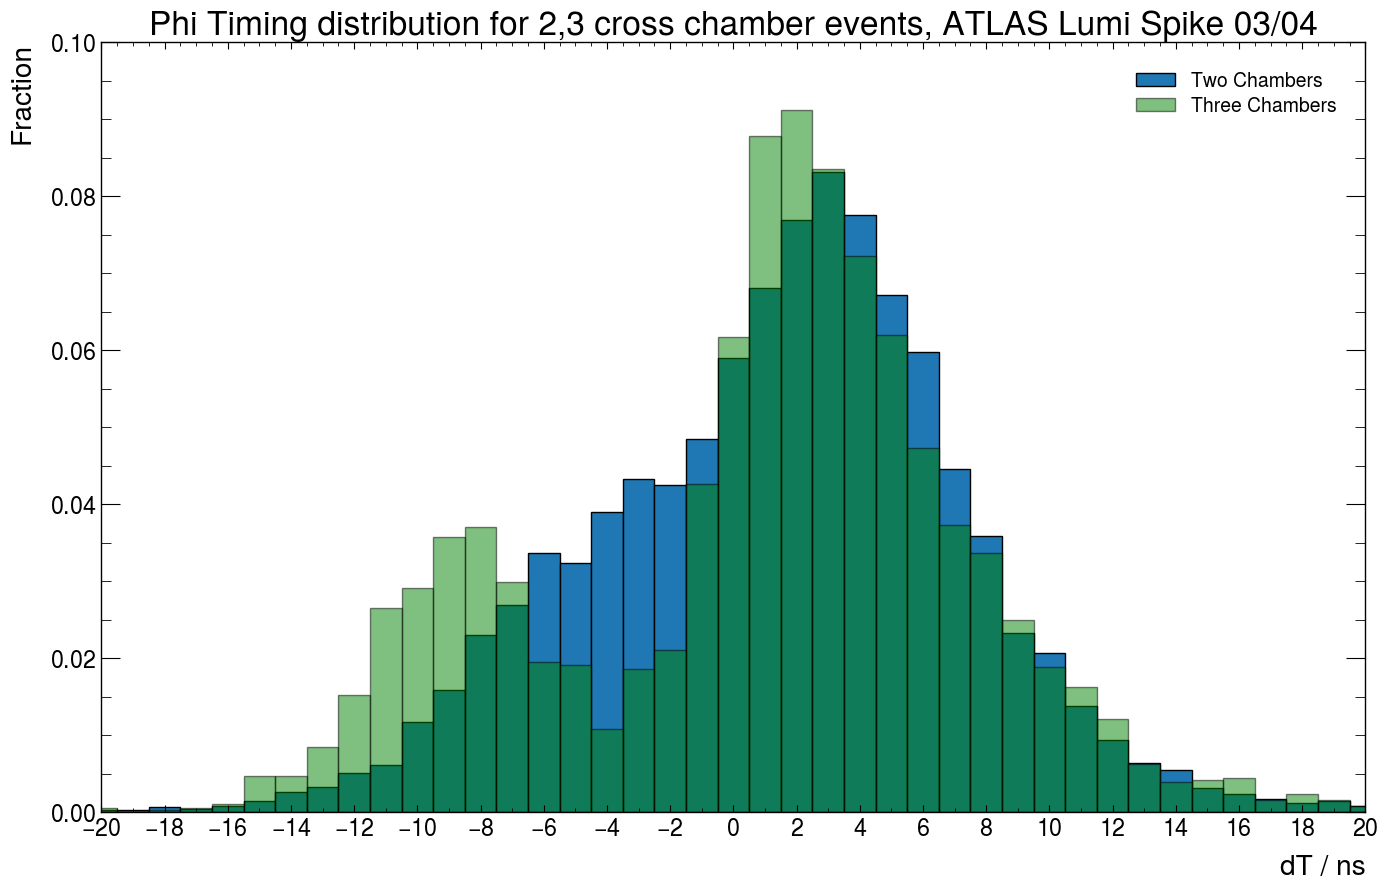

In [39]:
three_chambers = [dT for dZ, dT in zip(dZ, times_delta[0]) if dZ > 90] 
two_chambers = [dT for dZ, dT in zip(dZ, times_delta[0]) if 40< dZ < 80]

plot_time_distribution_fraction_2(two_chambers,three_chambers,"Phi Timing distribution for 2,3 cross chamber events, ATLAS Lumi Spike 03/04")

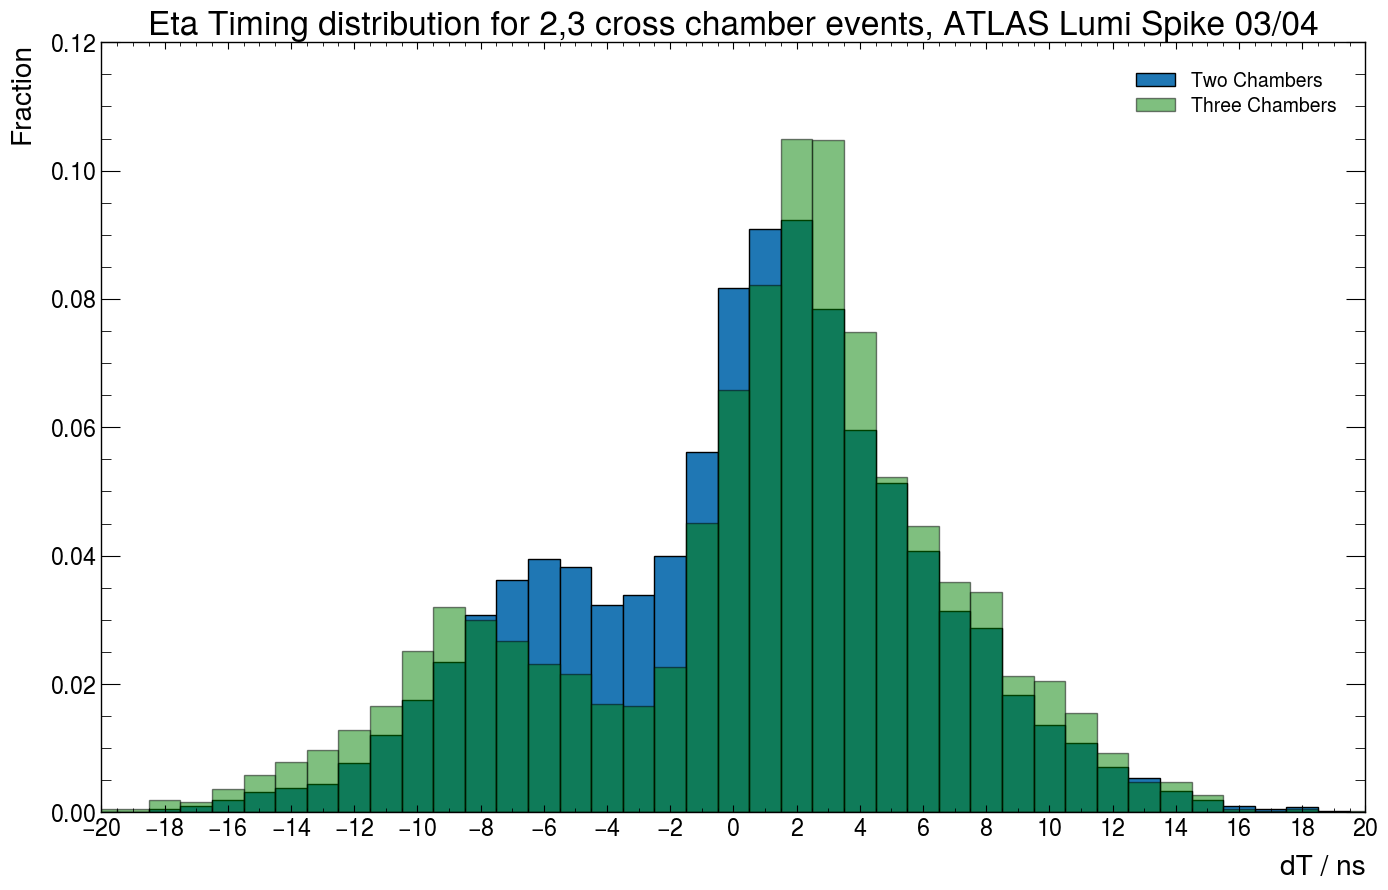

In [40]:
three_chambers = [dT for dZ, dT in zip(dZ, times_delta[1]) if dZ > 90] 
two_chambers = [dT for dZ, dT in zip(dZ, times_delta[1]) if 40< dZ < 80]

plot_time_distribution_fraction_2(two_chambers,three_chambers,"Eta Timing distribution for 2,3 cross chamber events, ATLAS Lumi Spike 03/04")

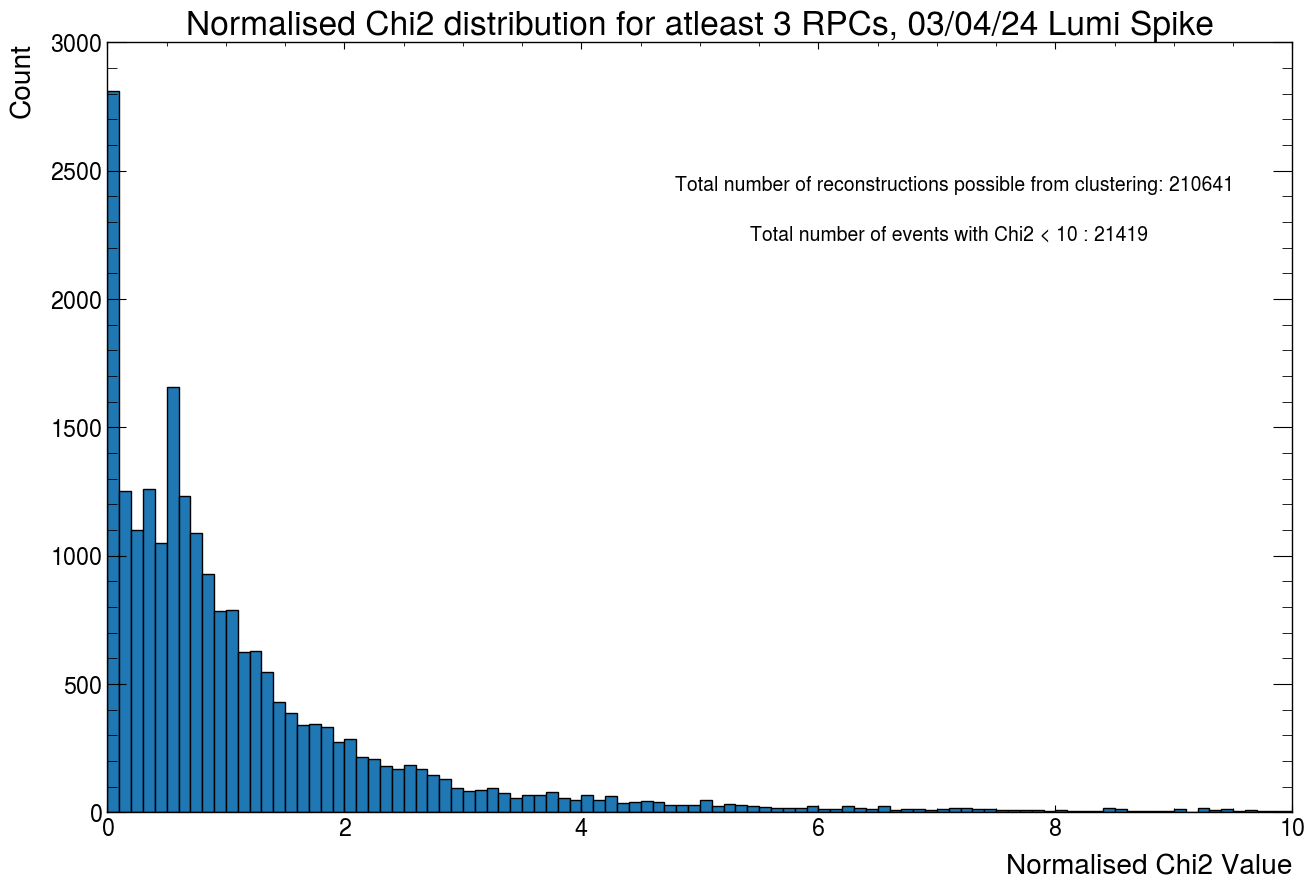

In [41]:
Chi2_values_filtered = [x for x in chi2_values if x <= 10]

plt.figure(figsize=(15,10))

bin_edges = np.arange(-0.5, 11.5, 0.1)

plt.hist(Chi2_values_filtered,density=False,edgecolor='black',bins=bin_edges)

#plt.xlim(0,100)
#plt.yscale('log')

plt.xlabel('Normalised Chi2 Value')
plt.ylabel('Count')

plt.xlim(0,10)

plt.annotate(f"Total number of reconstructions possible from clustering: {len(coincident_hits_ATLAS_clustered)}",(0.45,0.7),xycoords='figure fraction')
plt.annotate(f"Total number of events with Chi2 < 10 : {len(Chi2_values_filtered)}",(0.5,0.65),xycoords='figure fraction')

plt.title('Normalised Chi2 distribution for atleast 3 RPCs, 03/04/24 Lumi Spike')

plt.show()

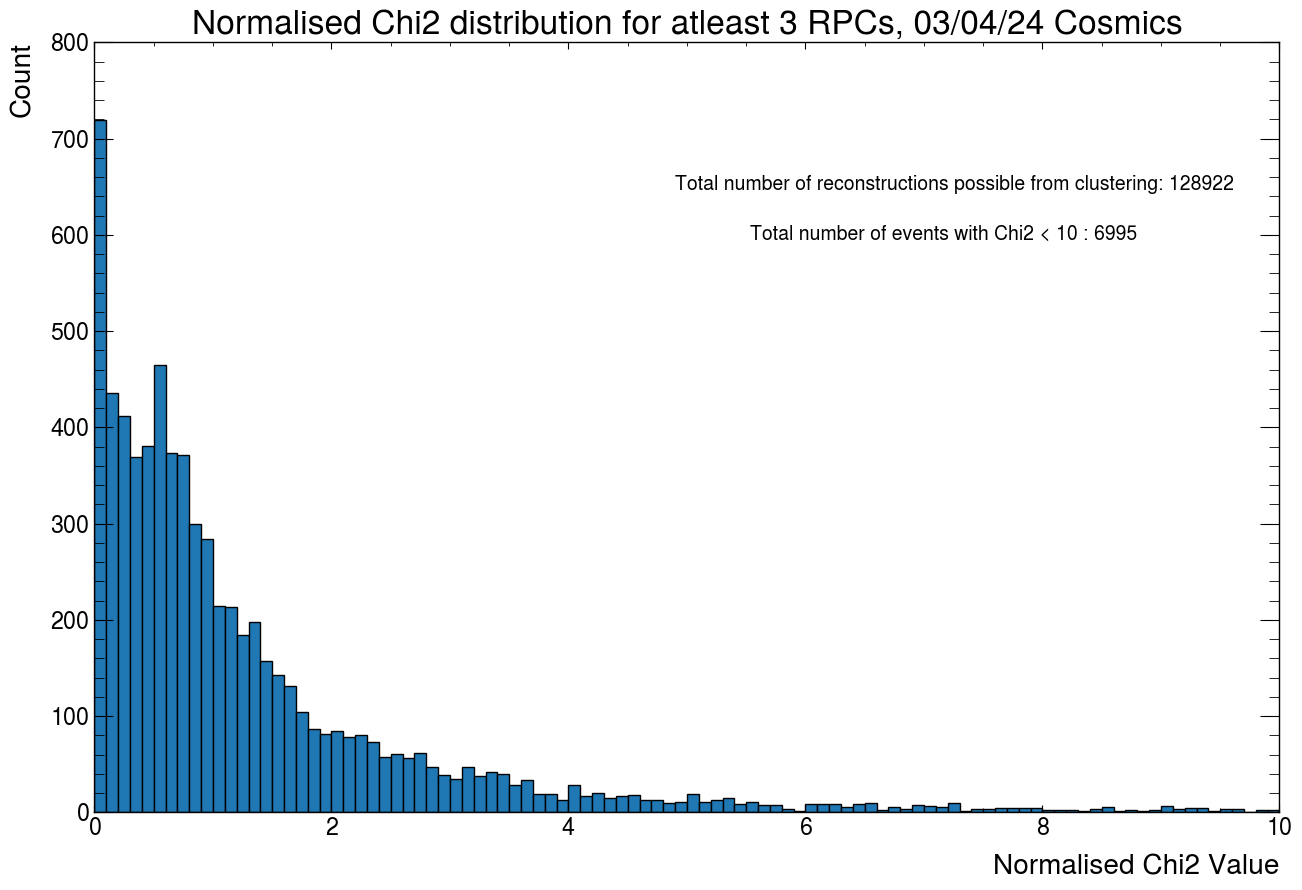

In [21]:
Chi2_values_filtered = [x for x in chi2_values_cosmics if x <= 10]

plt.figure(figsize=(15,10))

bin_edges = np.arange(-0.5, 11.5, 0.1)

plt.hist(Chi2_values_filtered,density=False,edgecolor='black',bins=bin_edges)

#plt.xlim(0,100)
#plt.yscale('log')

plt.xlabel('Normalised Chi2 Value')
plt.ylabel('Count')

plt.xlim(0,10)

plt.annotate(f"Total number of reconstructions possible from clustering: {len(coincident_hits_cosmics_clustered)}",(0.45,0.7),xycoords='figure fraction')
plt.annotate(f"Total number of events with Chi2 < 10 : {len(Chi2_values_filtered)}",(0.5,0.65),xycoords='figure fraction')

plt.title('Normalised Chi2 distribution for atleast 3 RPCs, 03/04/24 Cosmics')

plt.show()

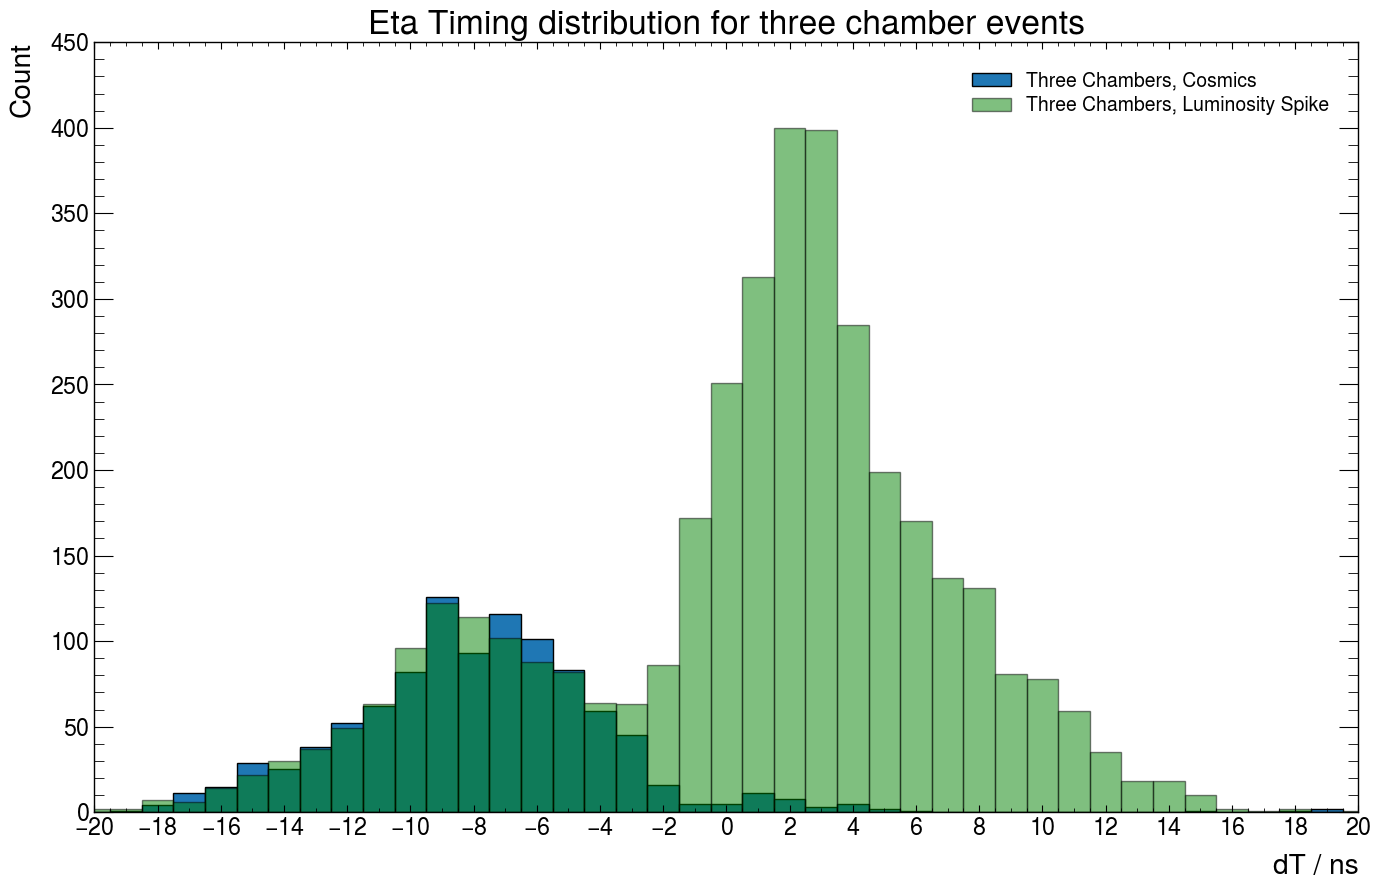

In [46]:
three_chambers = [dT for dZt, dT in zip(dZ, times_delta[1]) if dZt > 90] 
three_chambers_cosmics = [dT for dZ, dT in zip(dZ_cosmics, times_delta_cosmics[1]) if dZ > 90] 

plot_time_distribution_absolute_2(three_chambers_cosmics,three_chambers, "Eta Timing distribution for three chamber events")

In [23]:
def plot_time_distribution_absolute_2(times1, times2, title):
    # Flatten the arrays if they are multidimensional
    times1 = np.asarray(times1).flatten()
    times2 = np.asarray(times2).flatten()

    plt.figure(figsize=(16, 10))

    # Define bin edges centered on integers between -20 and +20
    bin_edges = np.arange(-20.5, 21.5, 1)

    # Plot histogram with counts
    plt.hist(times1, bins=bin_edges, range=[-20,20], density=False, edgecolor='black',label='Two Chambers, Cosmics')
    plt.hist(times2, bins=bin_edges, range=[-20,20], density=False, edgecolor='black', alpha=0.5, color = 'green', label='Two Chambers, Luminosity Spike')

    # Set x-ticks spacing to 1
    plt.xticks(np.arange(-20, 21, 2))

    plt.xlim(-20,20)

    # Customize the plot
    plt.xlabel('dT / ns')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()
    plt.grid(False)
    plt.show()

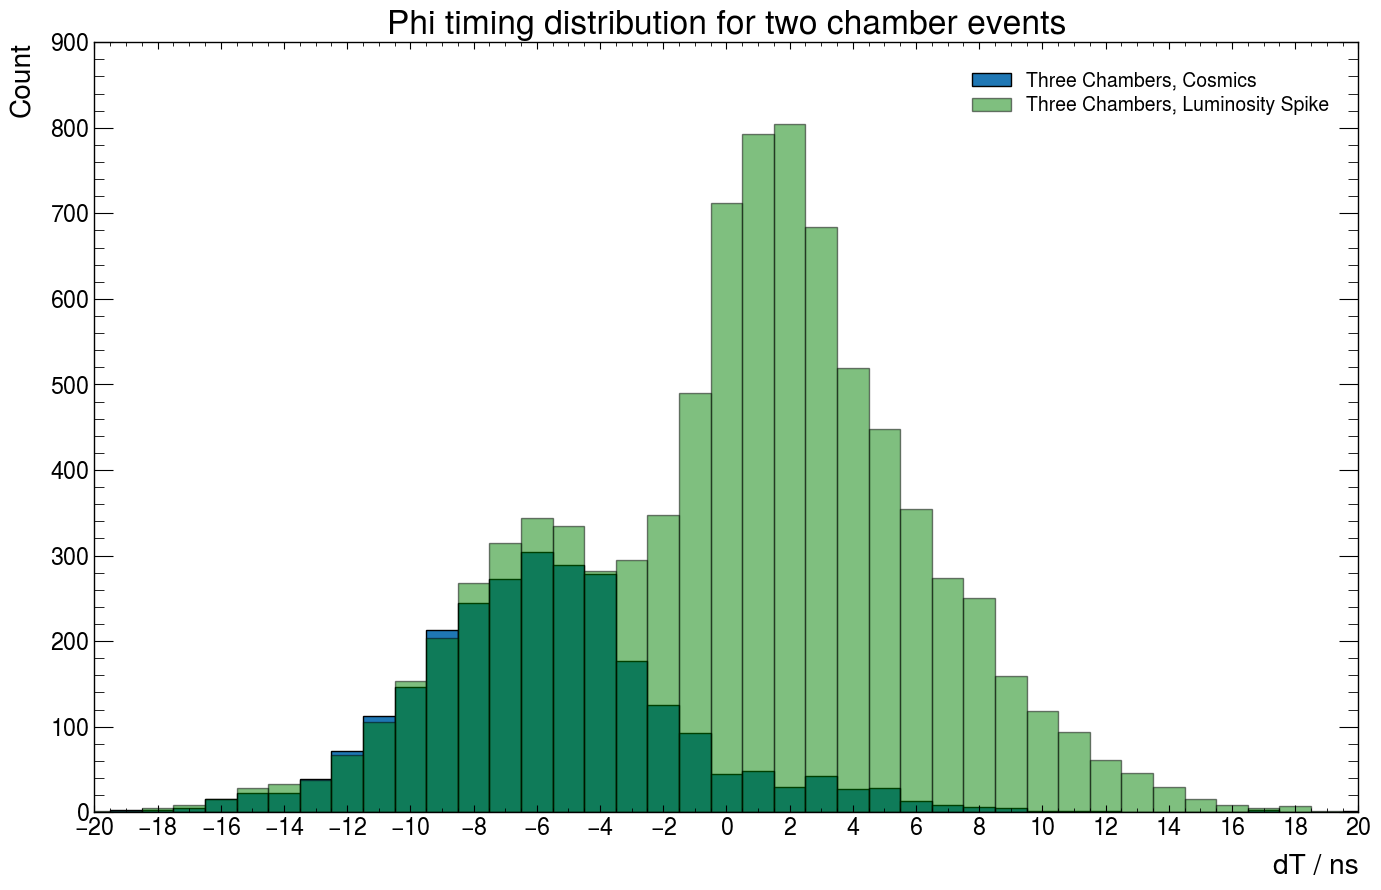

In [48]:
two_chambers = [dT for dZt, dT in zip(dZ, times_delta[1]) if 40< dZt < 80] 
two_chambers_cosmics = [dT for dZt, dT in zip(dZ_cosmics, times_delta_cosmics[1]) if 40< dZt < 80] 

plot_time_distribution_absolute_2(two_chambers_cosmics,two_chambers, "Phi timing distribution for two chamber events")

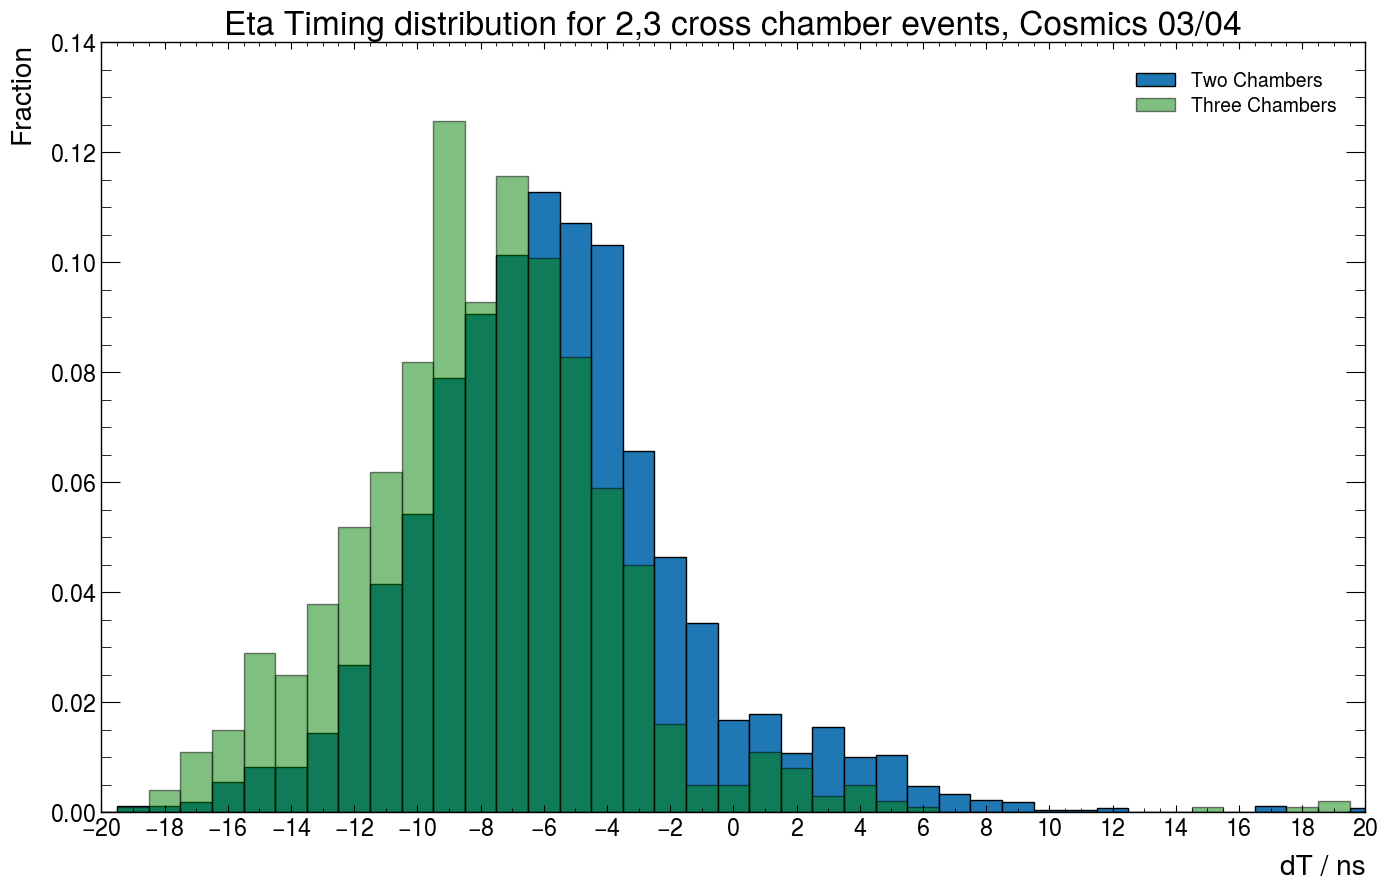

In [50]:
three_chambers = [dT for dZ, dT in zip(dZ_cosmics, times_delta_cosmics[1]) if dZ > 90] 
two_chambers = [dT for dZ, dT in zip(dZ_cosmics, times_delta_cosmics[1]) if 40< dZ < 80]

plot_time_distribution_fraction_2(two_chambers,three_chambers,"Eta Timing distribution for 2,3 cross chamber events, Cosmics 03/04")

Triplet timing d

In [92]:
def extract_triplet_DT(optimised_coords):
    #optimised_oordinates = [[[x0,var,time],[y0,var,time],z0],[[x1,var,time],[y1,var,time],z1],...,[[x5,var,time],[y5,var,time],z5]]
    #Z coordinate given by height of relevant RPC.

    #Optimised coords already sorted by RPC.

    T_low_phi = optimised_coords[0][0][2]
    T_mid_phi= optimised_coords[1][0][2]
    T_high_phi= optimised_coords[2][0][2]

    T_low_eta = optimised_coords[0][1][2]
    T_mid_eta= optimised_coords[1][1][2]
    T_high_eta= optimised_coords[2][1][2]



    return [T_low_phi,T_mid_phi,T_high_phi], [T_low_eta,T_mid_eta,T_high_eta]
    

In [93]:
def extract_coords_timed_Chi2(event,max_cluster_size):

    #This function converts spatially clusters in RPCs into x and y coordinates (z given by RPC number)
    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]

    #Extract x and y coords of cluster in event
    distance_per_phi_channel = 2.7625 #cm
    distance_per_eta_channel = 2.9844 #cm
    
    coords = []

    for RPC in range(6):
        
        x_clusters = [x for x in event[2][RPC][0] if len(x)<=max_cluster_size] #phi direction
        y_clusters = [y for y in event[2][RPC][1] if len(y)<=max_cluster_size] #eta direction

        #Finding size of largest cluster, consider coordinates bad if largest cluster is larger than 6.
        x_clusters_lengths = [len(x) for x in event[2][RPC][0]]
        y_clusters_lengths = [len(y) for y in event[2][RPC][1]]

        max_length = max(max(x_clusters_lengths, default=0), max(y_clusters_lengths, default=0))

        x_coords = []
        y_coords = []

        for x_cluster in x_clusters:
           #x_cluster = [[RPC,CHANNEL,TIME,'phi'],...]
            phi_channels = [x[1] for x in x_cluster]
            phi_times = [t[2] for t in x_cluster]

            #Convert the channel number into a measurement along the RPC.
            x_values = [(phi_channel+0.5)*distance_per_phi_channel for phi_channel in phi_channels]

            #Variance in x coord.
            x_var = (1*distance_per_phi_channel)**2/12

            x_coords.append([np.mean(x_values),x_var,np.average(phi_times)])

        for y_cluster in y_clusters:
            #y_cluster = [[RPC,CHANNEL,TIME,'eta'],...]
            eta_channels_corrected = [31-y[1] for y in y_cluster] #corrected for labelling from 0 to 31.
            eta_times = [t[2] for t in y_cluster]
            y_values = [(channel_num+0.5)*distance_per_eta_channel for channel_num in eta_channels_corrected]
            
            y_var = (1*distance_per_eta_channel)**2 /12
            y_coords.append([np.mean(y_values),y_var,np.average(eta_times)])

        if x_coords and y_coords and max_length<6:

            coords.append([x_coords, y_coords])

        else:
            coords.append([[],[],"N"])

    #[x_coords] = [[x,err_x,x_time],...]
    
    #RPC_coords = [x_coords,y_coords]

    #coords = [[RPC1_coords],[RPC2_coords],[RPC3_coords],...]
    return coords

def extract_DT_DZ_Chi2(coords):

    RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.
    #coords = [[[x0,var,time],[y0,var,time],z0],[[x1,var,time],[y1,var,time],z1],...,[[x5,var,time],[y5,var,time],z5]]

    phi_times = [[RPC,x[0][2]] for RPC, x in enumerate(coords) if isinstance(x[2], (float, int))]
    eta_times = [[RPC,y[1][2]] for RPC, y in enumerate(coords) if isinstance(y[2], (float, int))]

    #Should already be sorted, but just in case.
    #Sort times by RPC, with RPC at lowest height at first entry.

    if len(phi_times) > 1:

        phi_times_sorted = sorted(phi_times, key=lambda x: x[0])

        #print(times_sorted)

        phi_dT = phi_times_sorted[-1][1]-phi_times_sorted[0][1]
        #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
        #Vice-versa for dT < 0 

        phi_first_RPC = phi_times_sorted[0][0]
        phi_last_RPC = phi_times_sorted[-1][0]

        dZ = RPC_heights[phi_last_RPC] - RPC_heights[phi_first_RPC]

        if len(eta_times) >1:

            eta_times_sorted = sorted(eta_times, key=lambda x: x[0])

            eta_dT = eta_times_sorted[-1][1]-eta_times_sorted[0][1]

        dT = [phi_dT,eta_dT]
    
        return dT, dZ
    
    else:
        pass

def fit_event_chi2(coordinates_with_error):
    #Coordinates = [[[x0,var,time],[y0,var],z0],[[x1,var,time],[y1,var],z1],...,[[x5,var,time],[y5,var],z5]]
    #Z coordinate given by height of relevant RPC.
    #Using SVD

    # Calculate dT for event, in ns
    dT, dZ = extract_DT_DZ_Chi2(coordinates_with_error)
    
    coordinates = []

    for coords in coordinates_with_error:
        coordinates.append([coords[0][0],coords[1][0],coords[2]])

    centroid = np.mean(coordinates, axis=0)
    subtracted = coordinates-centroid

    # performing SVD
    _, _, V = np.linalg.svd(subtracted)
    
    # find the direction vector (which is the right singular vector corresponding to the largest singular value)
    direction = V[0, :]

    # A line is defined by the average and its direction
    p0 = centroid
    d = direction

    #Work out Chi2. Minimise this to find best fit (from possible combos)

    Chi2 = 0

    i = 0 

    for point in coordinates_with_error:
        
        i+=2
        
        z = point[2]
        x = point[0][0]
        y = point[1][0]
        x_var = point[0][1]
        y_var = point[1][1]

        z_0 = centroid[2]

        # t = (z-z_0)/d_z

        t = (z-z_0)/d[2]

        # Find expected (x,y) coordinates at that height.

        x_traj = centroid[0] + t*d[0]
        y_traj = centroid[1] + t*d[1]

        Chi2_x = (x-x_traj)**2 / x_var
        Chi2_y = (y-y_traj)**2 / y_var

        Chi2+= Chi2_x
        Chi2+= Chi2_y

    # i is number of fitted points. There are 4 fitted paramters, 2 for each x and y. 
    doF = i - 4

    Chi2 = Chi2/ doF

    return p0, d, Chi2, coordinates, dT, dZ

def generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations=None, hit_coords=None, depth=0):

    if combinations is None:
        combinations = []
    if hit_coords is None:
        hit_coords = []

    if depth == len(coords):
        combinations.append(hit_coords.copy())
        return combinations

    x_values = coords[depth][0]
    y_values = coords[depth][1]

    if not x_values or not y_values:
        return generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations, hit_coords, depth + 1)

    for x in x_values:
        for y in y_values:
            if x is not None and y is not None and isinstance(x[0], (int, float)) and isinstance(y[0], (int, float)):
                hit_coords.append([x, y, RPC_heights[depth]])
                generate_hit_coords_combo_Chi2(coords, RPC_heights, combinations, hit_coords, depth + 1)
                hit_coords.pop()

    return combinations

def reconstruct_timed_Chi2_modified(event,max_cluster_size):

    #timed tag indicates that timing information from RPC is used to determine direction of vertical transversal of "particle" in the event.

    max_Chi2 = 10

    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]
    RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.

    #Extract x and y coords of cluster in event

    coords = extract_coords_timed_Chi2(event,max_cluster_size)

    # Count the number of empty RPCs
    empty_RPC_count = sum(1 for item in coords if item == [[], [],'N'])

    # If less than 3 elements of coords are occupied, exit the function
    if empty_RPC_count > 3:
        #print("Failed to reconstruct, not enough coords")
        return None  # Exit the function
    
    #NEED TO CHECK IF STILL CROSS CHAMBER! 

    cross_chamberness = 0

    if coords[0] != [[], [], 'N'] or coords[1] != [[], [], 'N'] or coords[2] != [[], [], 'N']:
        cross_chamberness += 1

    if coords[3] != [[], [], 'N']:
        cross_chamberness += 1

    if coords[4] != [[], [], 'N'] or coords[5] != [[], [], 'N']:
        cross_chamberness += 1

    if cross_chamberness < 2:
        #print("Failed to reconstruct, too few chambers")
        return None
    
    #CHECK ALL RPCS IN TRIPLET FIRE 

    tripletness = 0 

    print(tripletness)

    if coords[0] != [[], [], 'N']:
        tripletness+=1

    if coords[1] != [[], [], 'N']:
        tripletness+=1

    if coords[2] != [[], [], 'N']:
        tripletness+=1

    if tripletness <3:
        print("Not enough Triplet RPCs!")
        return None

    #ITERATING OVER EVERY POSSIBLE COMBINATION OF x,y,z over all 3 RPCs (limited to one x,y per RPC).
    #Doesn't look particularly nice, but there are not many coordinates to loop over usually....

    combinations = ANT.generate_hit_coords_combo_Chi2(coords,RPC_heights)

    #Now for each combo in combinations, attempt to reconstruct a path. See which one gives the best trajectory.

    #If success, print parameters of fitting function.
    #If fail, print reconstruction failed.

    Chi2_current = np.inf
    optimised_coords = None
    optimised_d= None
    optimised_centroid= None
    dT = [np.inf,np.inf]
    optimised_ind = np.inf

    for ind,combo in enumerate(combinations):

        centroid, d, Chi2, coordinates, delta_T, delta_Z= fit_event_chi2(combo)

        #delta_T = [delta_T_phi,delta_T_eta]

        if Chi2 < Chi2_current:

            # If new fit is better than old then replace old fit properties.
            dZ = delta_Z 
            dT = delta_T
            Chi2_current = Chi2
            optimised_centroid = centroid
            optimised_d = d
            optimised_coords = coordinates
            optimised_index = ind

    #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
    #Vice-versa for dT < 0.

    #dT = 0 case?

    print(dT[0])
    
    if dT[0] != np.inf:

        if dT[0] > 0:
            if optimised_d[2] < 0:
                optimised_d = np.multiply(optimised_d,-1)
        else:
            if optimised_d[2] > 0:
                optimised_d = np.multiply(optimised_d,-1)

        Triplet_dt = extract_triplet_DT(combinations[optimised_index])

        print(Triplet_dt)

        if Chi2_current<max_Chi2:
            
            return optimised_centroid, optimised_d, optimised_coords, combinations, Chi2_current, dT, dZ, Triplet_dt

        else:
            #print("Failed to reconstruct, Chi2 too large")
            #return optimised_centroid, optimised_d, optimised_coords, combinations, residuals_current
            return None
    

In [69]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
three_rpc_events = ANT.filter_events(coincident_hits_ATLAS_clustered,1,3)
print("......")

Number of events in filter = 57690
......


In [94]:
dt_low_phi = []
dt_high_phi = []
dT_phi = []

dt_low_eta = []
dt_high_eta = []
dT_eta = []

for event in three_rpc_events:

    x = reconstruct_timed_Chi2_modified(event,3)

    if x:
        
        times = x[-1]

        T_mid_phi = times[0][1]
        T_low_phi = times[0][0]
        T_high_phi = times[0][2]

        dt_low_phi.append(T_mid_phi-T_low_phi)
        dt_high_phi.append(T_mid_phi-T_high_phi)
        dT_phi.append(T_high_phi - T_low_phi)

        T_mid_eta = times[1][1]
        T_low_eta = times[1][0]
        T_high_eta = times[1][2]

        dt_low_eta.append(T_mid_eta-T_low_eta)
        dt_high_eta.append(T_mid_eta-T_high_eta)
        dT_eta.append(T_high_eta - T_low_eta)



0
Not enough Triplet RPCs!
0
-2.5
([235.0, 234.0, 233.0], [248.0, 249.0, 251.0])
0
3.5
([242.0, 240.0, 238.0], [249.0, 250.0, 250.5])
0
Not enough Triplet RPCs!
0
4.0
([239.0, 239.0, 237.0], [251.0, 254.0, 251.5])
0
Not enough Triplet RPCs!
0
26.0
([243.0, 242.0, 239.0], [255.5, 256.5, 256.0])
0
Not enough Triplet RPCs!
0
11.0
([231.0, 231.0, 248.5], [249.0, 250.5, 248.0])
0
Not enough Triplet RPCs!
0
Not enough Triplet RPCs!
0
1.0
([236.5, 233.0, 237.33333333333334], [249.0, 249.0, 248.0])
0
Not enough Triplet RPCs!
0
-9.0
([254.0, 252.0, 250.5], [265.0, 265.0, 266.5])
0
Not enough Triplet RPCs!
0
7.0
([231.0, 231.0, 230.0], [244.5, 246.0, 246.0])
0
Not enough Triplet RPCs!
0
Not enough Triplet RPCs!
0
Not enough Triplet RPCs!
0
Not enough Triplet RPCs!
0
Not enough Triplet RPCs!
0
10.5
([232.0, 231.0, 229.0], [249.0, 252.0, 251.0])
0
-2.0
([229.0, 230.0, 226.0], [245.66666666666666, 244.5, 242.0])
0
Not enough Triplet RPCs!
0
1.0
([237.0, 234.0, 234.0], [253.5, 256.0, 255.0])
0
1.5
(

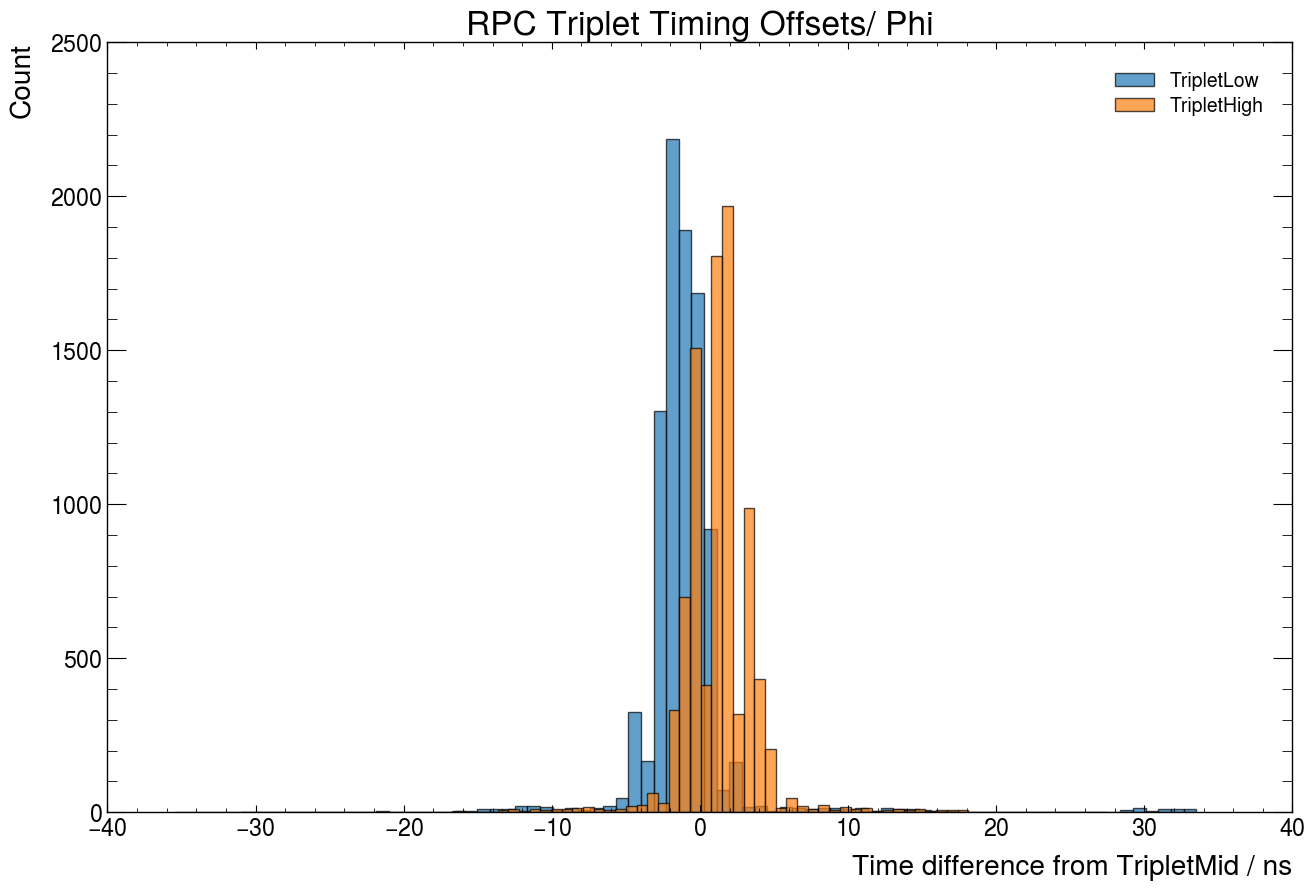

In [95]:
plt.figure(figsize=(15,10))

plt.hist(dt_low_phi, bins=81, density=False,edgecolor='black',alpha=0.7, label='TripletLow')

plt.hist(dt_high_phi, bins=81, density=False,edgecolor='black',alpha=0.7, label='TripletHigh')

plt.xlabel('Time difference from TripletMid / ns')
plt.ylabel('Count')

plt.title('RPC Triplet Timing Offsets/ Phi')

plt.legend()

plt.show()

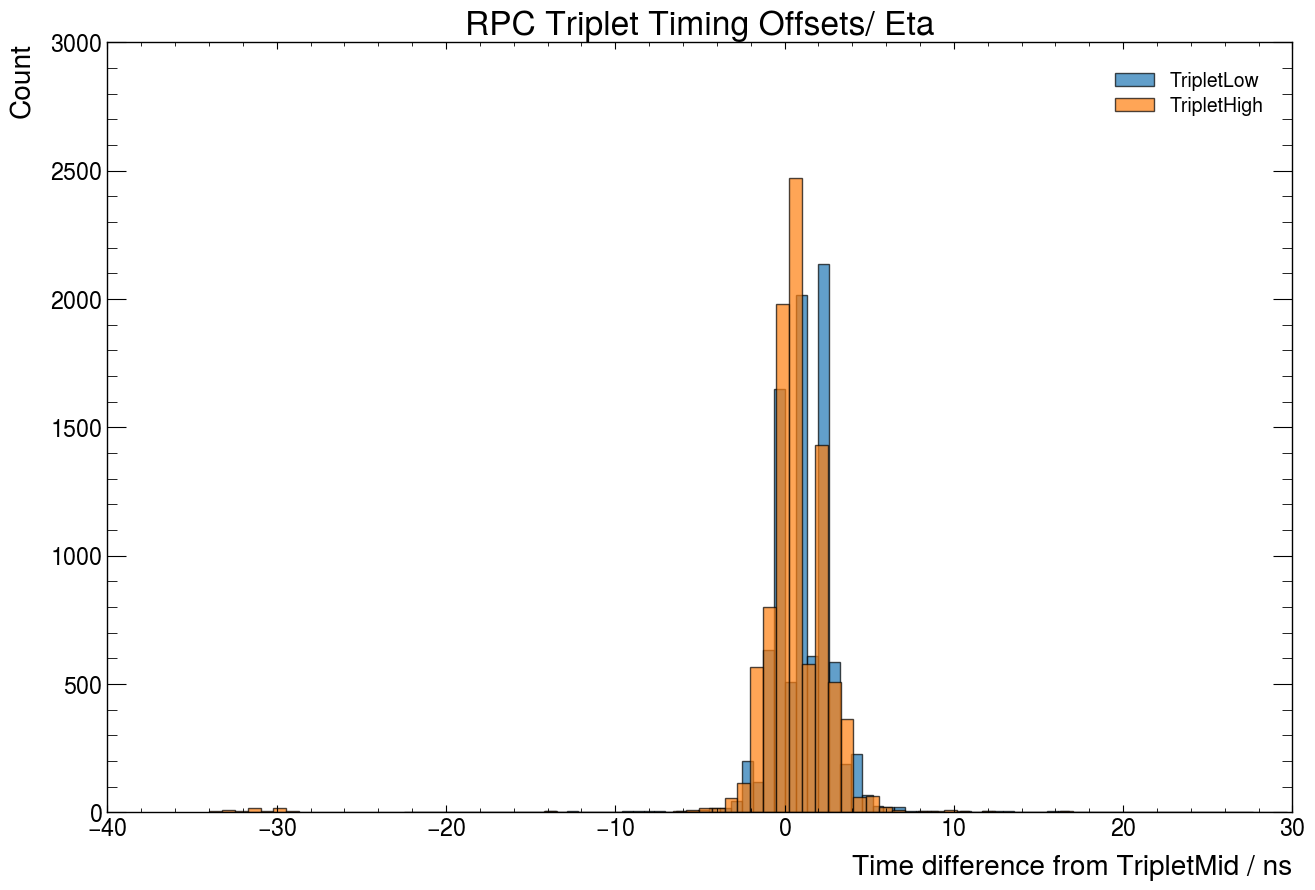

In [96]:
plt.figure(figsize=(15,10))

plt.hist(dt_low_eta, bins=81, density=False,edgecolor='black',alpha=0.7, label='TripletLow')

plt.hist(dt_high_eta, bins=81, density=False,edgecolor='black',alpha=0.7, label='TripletHigh')

plt.xlabel('Time difference from TripletMid / ns')
plt.ylabel('Count')

plt.title('RPC Triplet Timing Offsets/ Eta')

plt.legend()

plt.show()

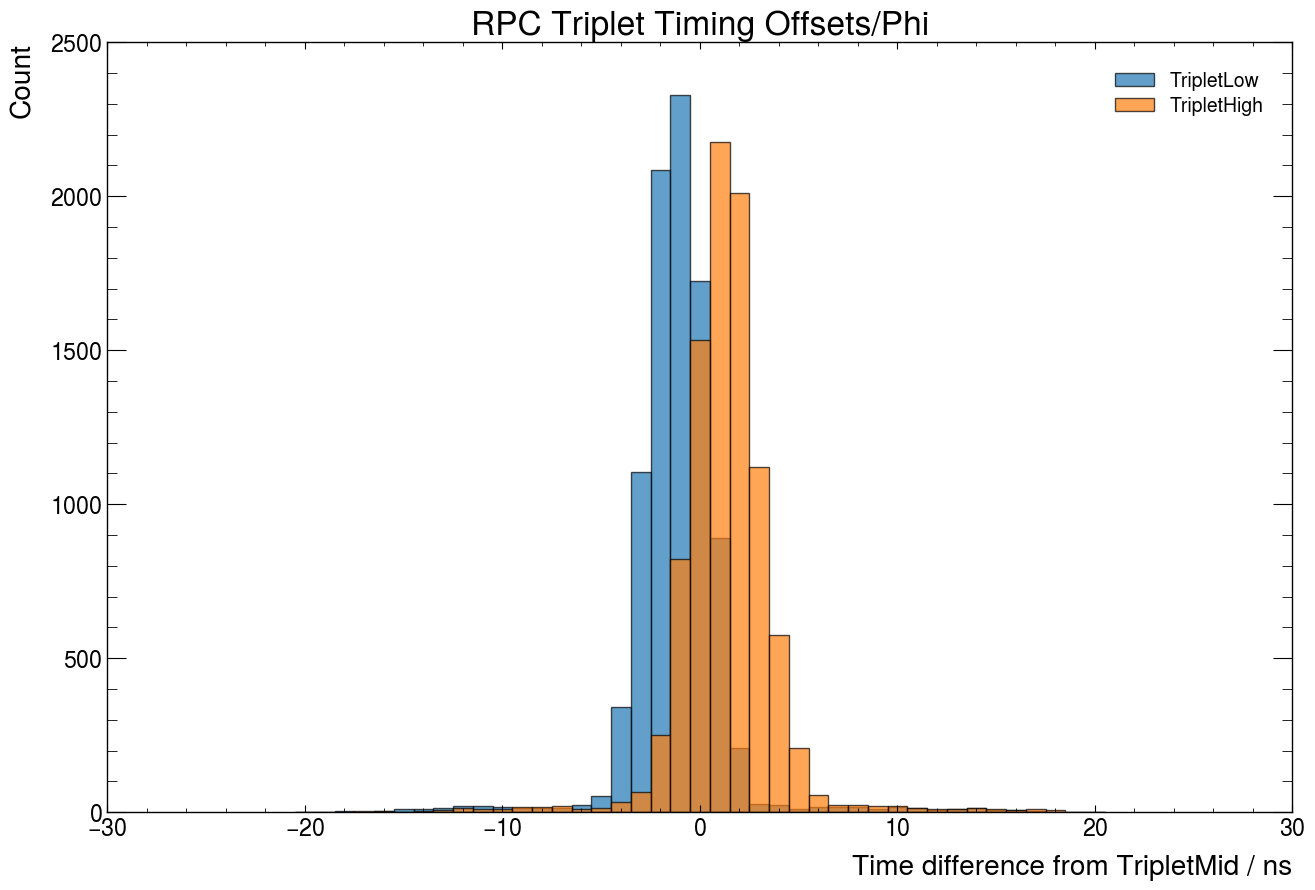

In [90]:
dt_low_filtered = [x for x in dt_low_phi if abs(x)< 20]
dt_high_filtered = [x for x in dt_high_phi if abs(x)< 20]


plt.figure(figsize=(15,10))

bin_edges = np.arange(-20.5, 21.5, 1)

plt.hist(dt_low_filtered, bins=bin_edges, density=False,edgecolor='black',alpha=0.7, label='TripletLow')

plt.hist(dt_high_filtered, bins=bin_edges, density=False,edgecolor='black',alpha=0.7, label='TripletHigh')

plt.xlabel('Time difference from TripletMid / ns')
plt.ylabel('Count')

plt.title('RPC Triplet Timing Offsets/Phi')

plt.legend()

plt.show()

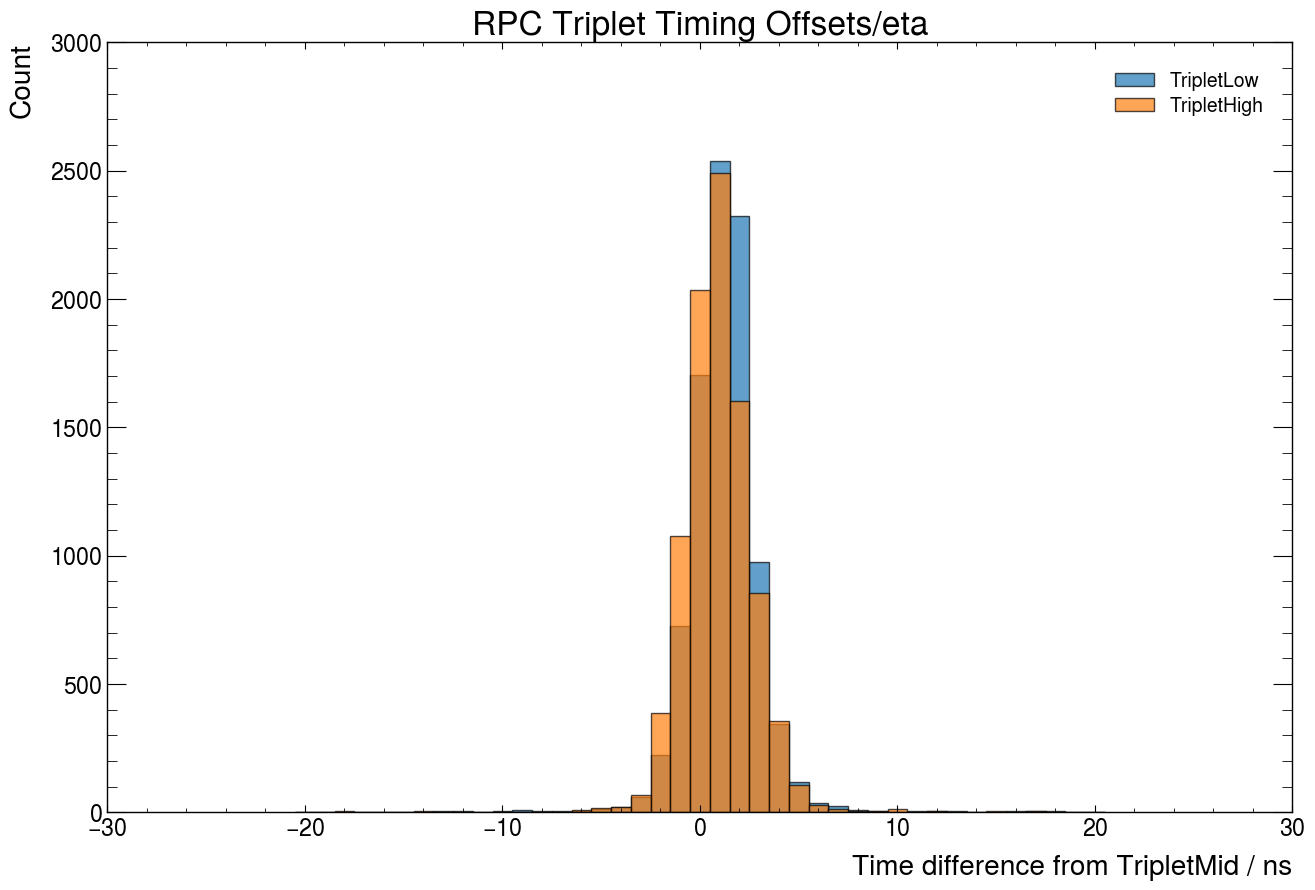

In [97]:
dt_low_filtered = [x for x in dt_low_eta if abs(x)< 20]
dt_high_filtered = [x for x in dt_high_eta if abs(x)< 20]


plt.figure(figsize=(15,10))

bin_edges = np.arange(-20.5, 21.5, 1)

plt.hist(dt_low_filtered, bins=bin_edges, density=False,edgecolor='black',alpha=0.7, label='TripletLow')

plt.hist(dt_high_filtered, bins=bin_edges, density=False,edgecolor='black',alpha=0.7, label='TripletHigh')

plt.xlabel('Time difference from TripletMid / ns')
plt.ylabel('Count')

plt.title('RPC Triplet Timing Offsets/eta')

plt.legend()

plt.show()

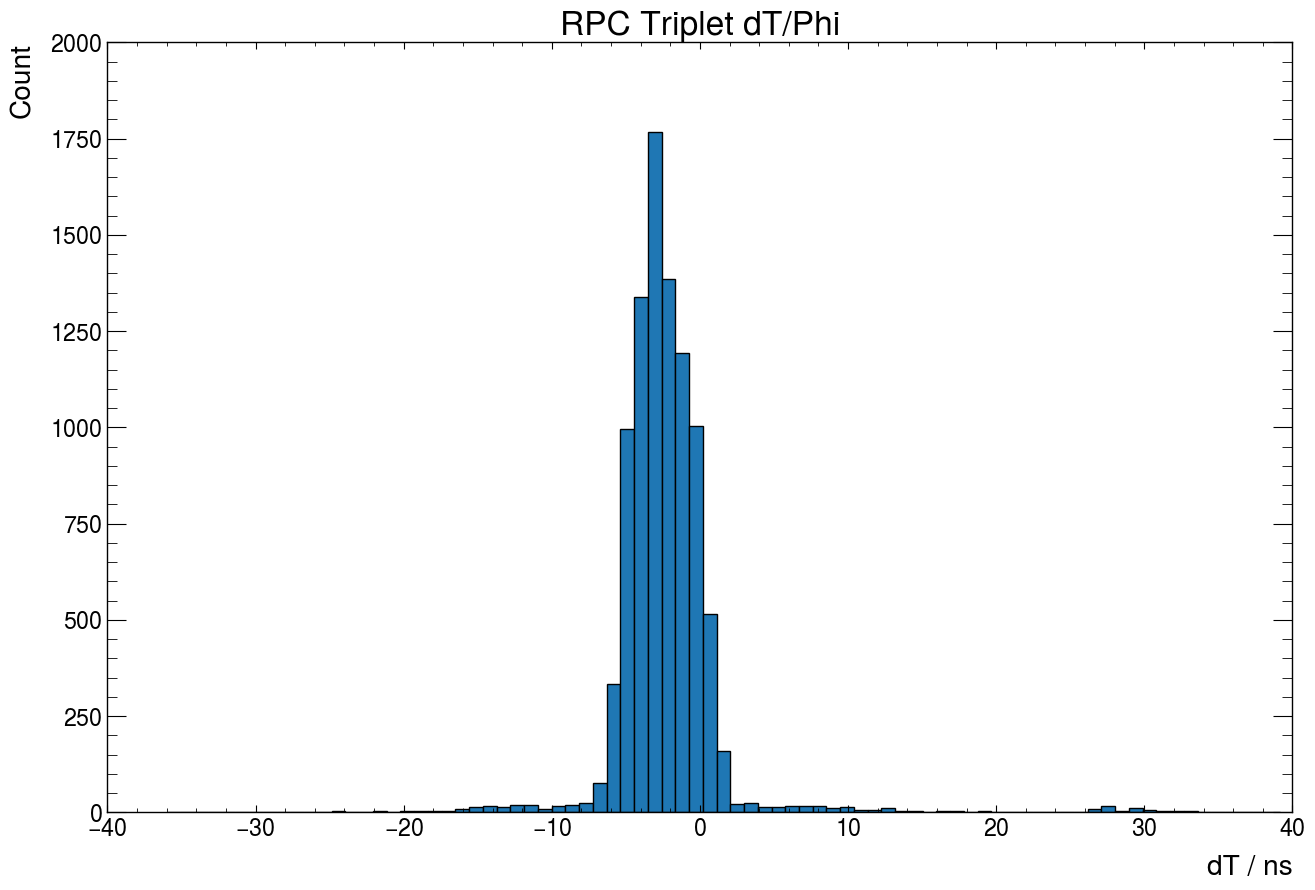

In [98]:
plt.figure(figsize=(15,10))

plt.hist(dT_phi, bins=81, density=False,edgecolor='black',alpha=1.0)
plt.xlabel('dT / ns')
plt.ylabel('Count')

plt.title('RPC Triplet dT/Phi')

plt.show()

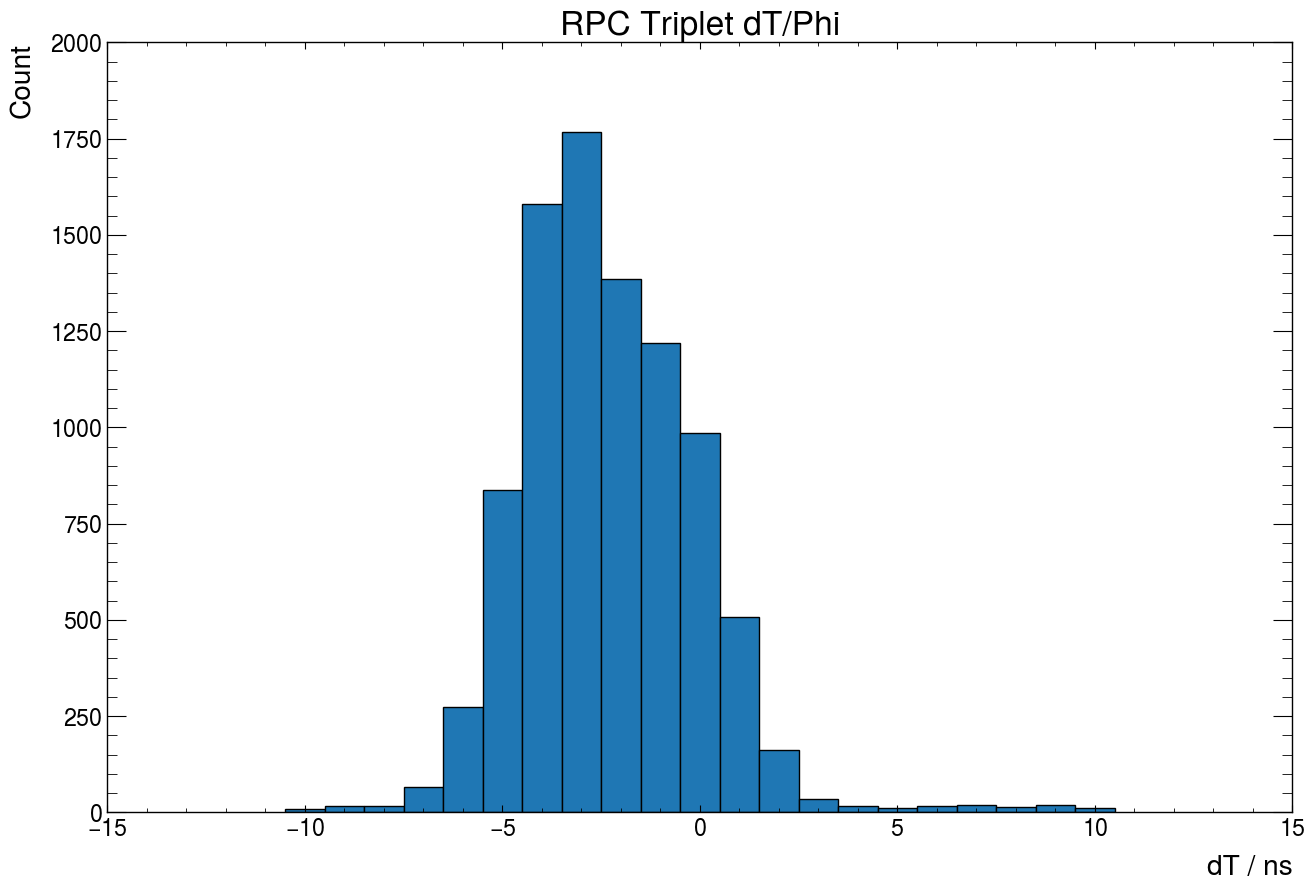

In [101]:
plt.figure(figsize=(15,10))

dT_phi_filtered = [x for x in dT_phi if abs(x) <=10]

bin_edges = np.arange(-10.5, 11.5, 1)

plt.hist(dT_phi_filtered, bins=bin_edges, density=False,edgecolor='black',alpha=1.0)
plt.xlabel('dT / ns')
plt.ylabel('Count')

plt.title('RPC Triplet dT/Phi')

plt.show()

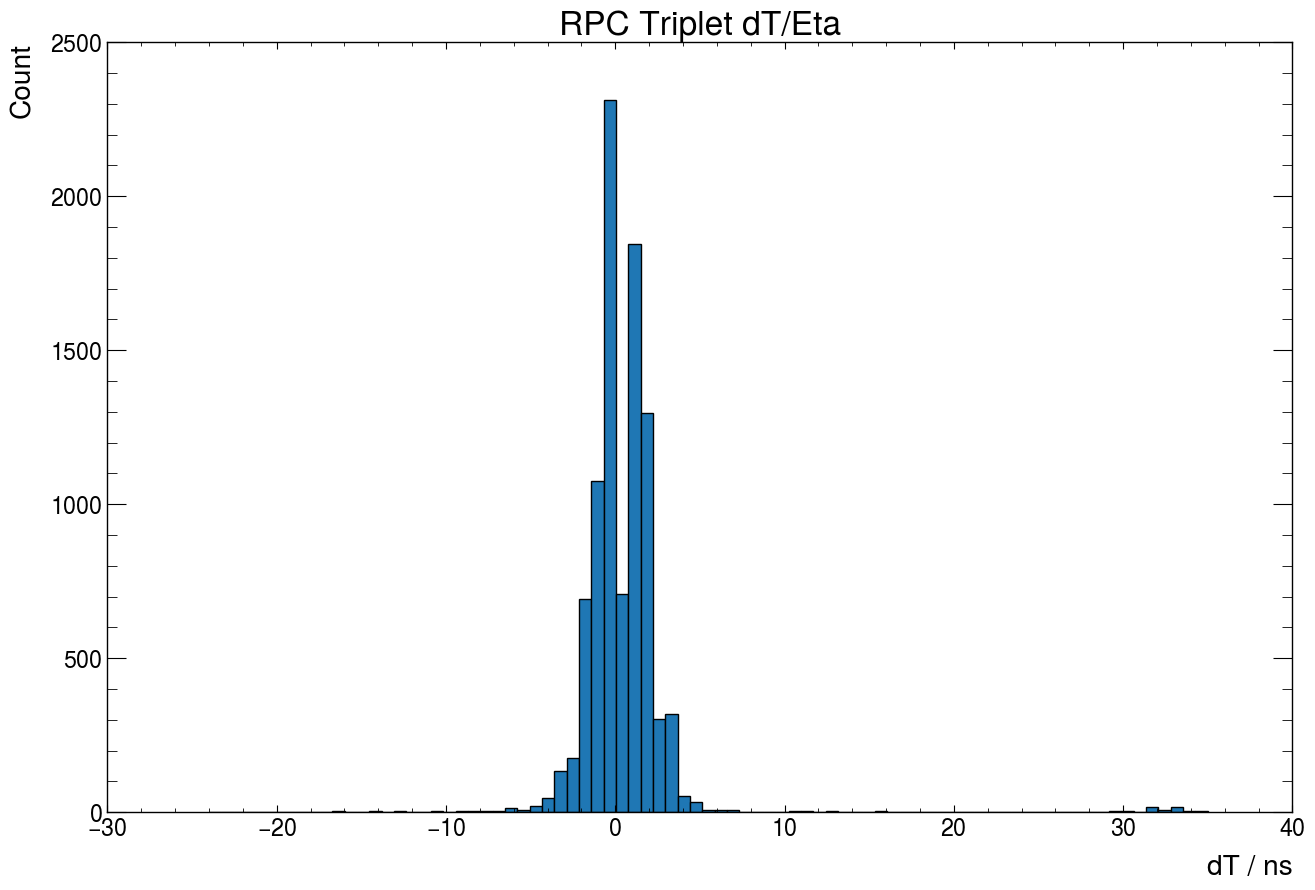

In [99]:
plt.figure(figsize=(15,10))

plt.hist(dT_eta, bins=81, density=False,edgecolor='black',alpha=1.0)
plt.xlabel('dT / ns')
plt.ylabel('Count')

plt.title('RPC Triplet dT/Eta')

plt.show()